<a href="https://colab.research.google.com/github/20146174/AI/blob/main/Tu%E1%BA%A7n_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=abf7e21ee3de77263167cd8d1fe5408637e3114467b4cfc4c59478a6cf7f5240
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


so:3


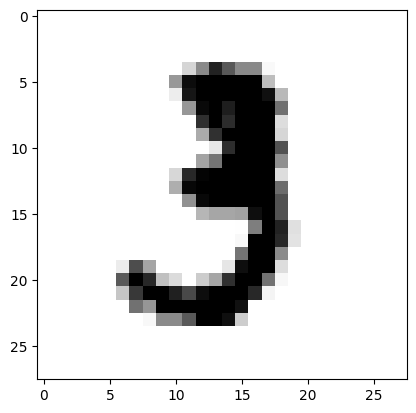

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()
import matplotlib.pyplot as plt
img = train_images[10]
plt.imshow(img, cmap = plt.cm.binary)
plt.show
print('so:{}' .format(train_labels[10]))



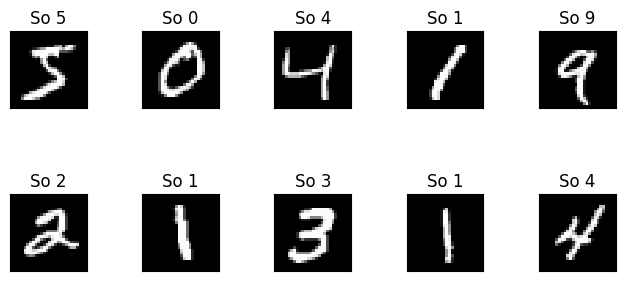

In [4]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation= 'none')
  plt.title('So {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
from keras import models
from keras.layers import Dense

model = models.Sequential()
model.add(Dense(512,activation='relu', input_shape = (28*28,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255
     
from keras.utils import to_categorical 
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
     
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs= 10, batch_size= 128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Do chinh xac tren tap kiem tra', test_acc)
print('Ham mat mat tren tap kiem tra', test_loss)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2625 - accuracy: 0.9243
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1068 - accuracy: 0.9687
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0706 - accuracy: 0.9793
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0514 - accuracy: 0.9844
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0384 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0289 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0170 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0128 - accuracy: 0.9968
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9821

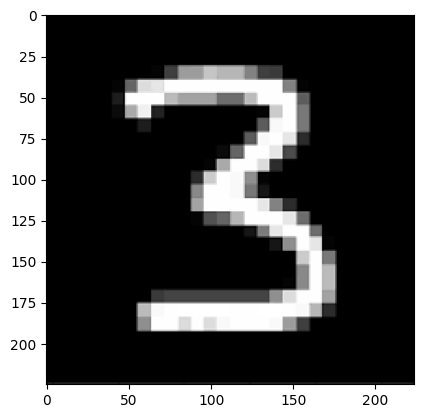

In [7]:
from keras.utils import load_img
url = '/phat.png'
img = load_img(url)
plt.imshow(img)

1/1 [==============================] - 0s 71ms/step
Predicted Number:  3


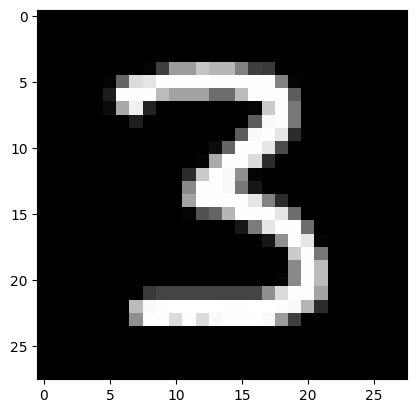

In [8]:
from keras.utils import load_img, img_to_array
import numpy as np
img1 = load_img(url, target_size = (28,28), color_mode = "grayscale")
plt.imshow(img1, cmap='gray')
img1 = img_to_array(img1)
img1 = img1[:,:,0]
img1 = img1.reshape(1,28*28)
img1 = img1.astype('float32')
img1 = img1/255.0    
predict_num = np.argmax(model.predict(img1))
print("Predicted Number: ",   predict_num)

In [9]:
model.save('model1.h5')
from keras.models  import   load_model
model11 = load_model('model1.h5')